# Challenge: What test to use

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Columns: https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")

print(df.shape)
df.columns

(8594, 13)


Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

In [3]:
df.fillna(0, inplace=True)

In [4]:
# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
# Question: How do we use t-test and what not to calculate this instead?

print(df.groupby(["cntry", "year"])["ppltrst"].mean())

trust_2012 = df[df["year"] == 6][["cntry", "ppltrst"]].groupby("cntry").mean()
trust_2014 = df[df["year"] == 7][["cntry", "ppltrst"]].groupby("cntry").mean()

print((trust_2014-trust_2012)/trust_2012 * 100)

cntry  year
CH     6       5.677878
       7       5.751617
CZ     6       4.316109
       7       4.417933
DE     6       5.214286
       7       5.357143
ES     6       5.114592
       7       4.887057
NO     6       6.640219
       7       6.589603
SE     6       6.045154
       7       6.257709
Name: ppltrst, dtype: float64
        ppltrst
cntry          
CH     1.298701
CZ     2.359155
DE     2.739726
ES    -4.448743
NO    -0.762258
SE     3.516123


In [5]:
# df[df["year"] == 6][["ppltrst"]]
# df[df["year"] == 7][["ppltrst"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11466d7f0>]], dtype=object)

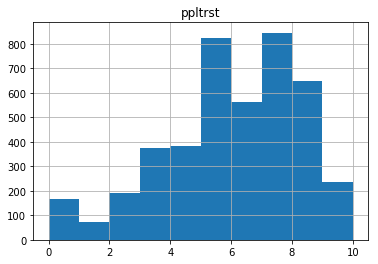

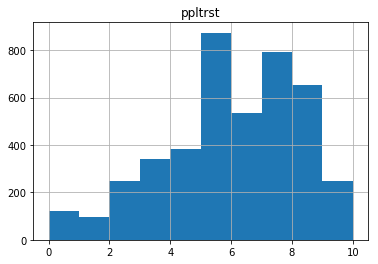

In [6]:
df[df["year"] == 6][["ppltrst"]].hist()
df[df["year"] == 7][["ppltrst"]].hist()

In [7]:
import scipy.stats as stats
#print(stats.ttest_ind(trust_2012, trust_2014))

print(stats.ttest_ind(df[df["year"] == 6][["ppltrst"]], df[df["year"] == 7][["ppltrst"]]))
#Since P is not smaller than 0.05, we can't reject H0 hence can't say the trust scores are different for these two years 

Ttest_indResult(statistic=array([-0.02885204]), pvalue=array([ 0.97698326]))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ef83048>]], dtype=object)

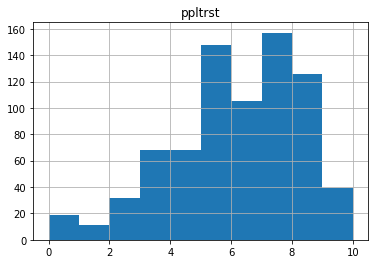

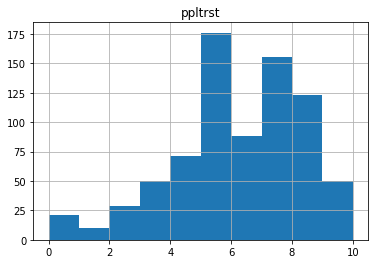

In [8]:
#but how about for each country?
df[(df.year == 6) & (df.cntry=='CH')][["ppltrst"]].hist()
df[(df.year == 7) & (df.cntry=='CH')][["ppltrst"]].hist()

In [9]:
print(stats.ttest_ind(df[(df.year == 6) & (df.cntry=='CH')][["ppltrst"]], \
                      df[(df.year == 7) & (df.cntry=='CH')][["ppltrst"]]))
#Since P is not smaller than 0.05, we can't reject H0 hence can't say trust scores are different for these two years 

Ttest_indResult(statistic=array([-0.67827166]), pvalue=array([ 0.4977011]))


In [10]:
country=df.cntry.unique()
for i in country:
    print('========')
    print(i)
    print(stats.ttest_ind(df[(df.year == 6) & (df.cntry==i)][["ppltrst"]], \
                      df[(df.year == 7) & (df.cntry==i)][["ppltrst"]]))

CH
Ttest_indResult(statistic=array([-0.67827166]), pvalue=array([ 0.4977011]))
CZ
Ttest_indResult(statistic=array([-0.77762019]), pvalue=array([ 0.43693293]))
DE
Ttest_indResult(statistic=array([-0.18084359]), pvalue=array([ 0.85789266]))
ES
Ttest_indResult(statistic=array([ 2.5827108]), pvalue=array([ 0.00986086]))
NO
Ttest_indResult(statistic=array([ 0.53868638]), pvalue=array([ 0.59018539]))
SE
Ttest_indResult(statistic=array([-2.22071525]), pvalue=array([ 0.02649337]))


In [11]:
## only ES has significant diff in happiness and it's a increase! 

In [12]:
# Did people become happier from 2012 to 2014? Compute results for each country in the sample.
# Question: How do we use t-test and what not to calculate this instead?

print(df.groupby(["cntry", "year"])["happy"].mean())

happy_2012 = df[df["year"] == 6][["cntry", "happy"]].groupby("cntry").mean()
happy_2014 = df[df["year"] == 7][["cntry", "happy"]].groupby("cntry").mean()

print((happy_2014-happy_2012)/happy_2012 * 100)


cntry  year
CH     6       8.056921
       7       8.116429
CZ     6       6.647416
       7       6.851064
DE     6       7.428571
       7       7.857143
ES     6       7.542457
       7       7.413850
NO     6       8.206566
       7       7.915185
SE     6       7.898678
       7       7.920705
Name: happy, dtype: float64
          happy
cntry          
CH     0.738600
CZ     3.063557
DE     5.769231
ES    -1.705104
NO    -3.550592
SE     0.278862


In [13]:
# Who reported watching more TV in 2012, men or women?
# 1 Male, 2 Female
# FEMALE
# Question: How do we use t-test and what not to calculate this instead?

df[df["year"] == 6].groupby(["gndr"])["tvtot"].mean()

gndr
1.0    3.896472
2.0    3.938871
Name: tvtot, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f242978>]], dtype=object)

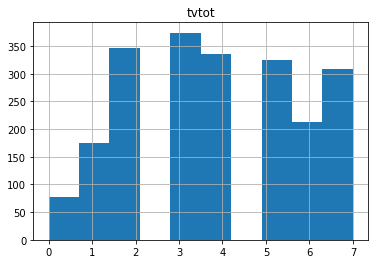

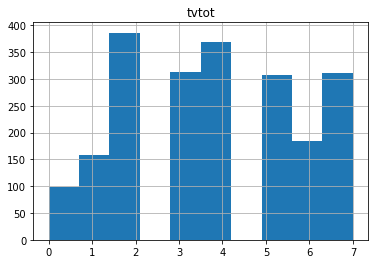

In [14]:
df[(df.year == 6) & (df.gndr==1)][["tvtot"]].hist()
df[(df.year == 7) & (df.gndr==2)][["tvtot"]].hist()

In [25]:
#not so normal, so we would use kruskal 
print(stats.kruskal(df[(df.year == 7) & (df.gndr==1)][["tvtot"]], df[(df.year == 7) & (df.gndr==2)][["tvtot"]]))

#since p is not smaller than 0.05, can't reject H0 hence can't conclude that male/female watch more TV or not 

KruskalResult(statistic=2.1988790412220069, pvalue=0.13811113936582456)


In [16]:
# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
# 1 Lives with husband/wife/partner at household grid, 2 Does not
# PEOPLE WITH PARTNERS
# Question: How do we use t-test and what not to calculate this instead?

df[df["year"] == 6].groupby(["partner"])["pplfair"].mean()

partner
0.0    6.000000
1.0    6.055722
2.0    5.827970
Name: pplfair, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f43d0f0>]], dtype=object)

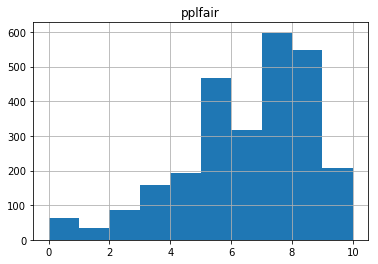

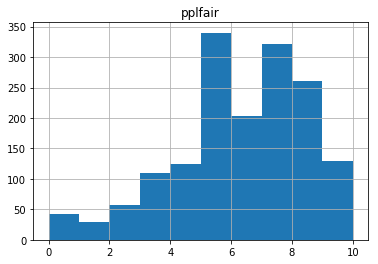

In [17]:
df[(df.year == 6) & (df.partner==1)][["pplfair"]].hist()
df[(df.year == 6) & (df.partner==2)][["pplfair"]].hist()

In [18]:
# we can check if a pandas series is normal or not (tests whether a sample differs from a normal distribution) 

stats.mstats.normaltest(df[(df.year == 6) & (df.partner==2)][["pplfair"]])

#since p is small, it's normal 

NormaltestResult(statistic=masked_array(data = [71.93888810163958],
             mask = [False],
       fill_value = 1e+20)
, pvalue=array([  2.39149200e-16]))

In [19]:
print('T-test')
print(stats.ttest_ind(df[(df.year == 6) & (df.partner==1)][["pplfair"]], \
                      df[(df.year == 6) & (df.partner==2)][["pplfair"]])) 


print('========')

print('Kruskal')
print(stats.kruskal(df[(df.year == 6) & (df.partner==1)][["pplfair"]], \
                      df[(df.year == 6) & (df.partner==2)][["pplfair"]]))




T-test
Ttest_indResult(statistic=array([ 3.3368593]), pvalue=array([ 0.00085452]))
Kruskal
KruskalResult(statistic=13.891888306657743, pvalue=0.00019363236442962553)


In [20]:
#Both show that there is significant difference in fairness score between people with partner and people without partner 
#With partner, people believe more in fairness

In [21]:
# Pick three or four of the countries in the sample and compare how often people met socially in 2014.
# Are there differences, and if so, which countries stand out?
# ANSWER: The countries that grew most in happiness met less socially (CZ DE) — seems counter intuitive
# Question: How do we use t-test and what not to calculate this instead?

df[df["year"] == 7].groupby("cntry")["sclmeet"].mean()

cntry
CH    5.153946
CZ    4.425532
DE    4.428571
ES    5.251443
NO    5.302326
SE    5.426211
Name: sclmeet, dtype: float64

In [22]:
# Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014.
# Are there differences, and if so, which countries stand out?
# AGAIN CZ AND DE HAVE SOME OF THE LOWEST RATES
# Question: How do we use t-test and what not to calculate this instead?

bins = [1, 30, 50, 70, 100]
df_y = df[df["year"] == 7]

groups = df_y.groupby(["cntry", pd.cut(df_y["agea"], bins)])["sclact"].mean()
groups.unstack()

agea,"(1, 30]","(30, 50]","(50, 70]","(70, 100]"
cntry,,,,
CH,2.812500,2.743494,2.716279,2.769231
CZ,2.919118,2.623482,2.682028,2.365854
DE,NaN,3.000000,2.857143,2.000000
ES,2.705882,2.665888,2.551429,2.090909
NO,2.956790,2.789474,2.827586,2.948052
SE,2.895000,2.827731,2.847973,2.916084
